In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit
from matplotlib.pylab import subplots
import matplotlib.patches as patches

In [306]:
fname='player_attributes.csv'
pl=pd.read_csv(fname)
pl['Attack']=pl.loc[:,['Crossing','Finishing','Heading Accuracy','Short Passing','Volleys']].mean(1)
pl['Skill']=pl.loc[:,['Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control']].mean(1)
pl['Movement']=pl.loc[:,['Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance']].mean(1)
pl['Power']=pl.loc[:,['Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots']].mean(1)
pl['Defending']=pl.loc[:,['Marking', 'Standing Tackle', 'Sliding Tackle']].mean(1)
pl['Goalkeeping']=pl.loc[:,[ 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']].mean(1)
pl['Attacking+Skill']=pl.loc[:,['Attacking','Skill']].mean(1)
ph=pl['Height'].tolist()
ph=[i.strip('""').split('\'') for i in ph]
ph=np.array([(int(i[0])*12+int(i[1]))*2.54 for i in ph])
pl['H/cm']=ph
pw=pl['Weight'].values*0.4535924
BMI=pw/ph**2*1e4
pl['BMI']=BMI

C:\Users\z\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [307]:
plp=pl.groupby('Player Category')
sp=plp.get_group('Striker')
gp=plp.get_group('GoalKeeper')
mp=plp.get_group('Midfielder')
dp=plp.get_group('Defender')
sp['Mentality']=sp.loc[:,['Aggression', 'Positioning', 'Vision', 'Penalties', 'Composure']].mean(1)
dp['Mentality']=dp.loc[:,['Aggression', 'Interceptions', 'Positioning', 'Vision', 'Composure']].mean(1)
mp['Mentality']=mp.loc[:,['Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure']].mean(1)
gp['Mentality']=gp.loc[:,['Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure']].mean(1)
op=pd.concat([sp,mp,dp])

C:\Users\z\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\z\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\z\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#index

(-1.1605317629258018,
 1.162129147160549,
 -1.1648652879342525,
 1.163820826525858)

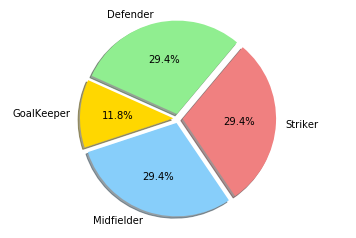

In [368]:
sizes=plp.count()['H/cm']
explode=[0.05,0.05,0.05,0.05]
labels='Defender','GoalKeeper','Midfielder','Striker'
colors='lightgreen','gold','lightskyblue','lightcoral'
plt.pie(sizes,explode=explode, shadow=True,\
labels=labels,colors=colors,autopct='%1.1f%%',startangle=50)
plt.axis('equal')

In [358]:
size

Player Category
Defender      2500
GoalKeeper    1000
Midfielder    2500
Striker       2500
Name: H/cm, dtype: int64

In [308]:
opH=op.groupby('H/cm').mean()
opW=op.groupby('Weight').mean()
opB=op.groupby('BMI').mean()
gpH=gp.groupby('H/cm').mean()
gpW=gp.groupby('Weight').mean()
gpB=gp.groupby('BMI').mean()

In [309]:
def ddraw(item,unit=''):
    x=pl[item]
    bins = np.linspace(x.min(),x.max(),10)
    x1 = np.linspace(x.min(), x.max(), 100)
    normal = mlab.normpdf(x1, x.mean(), x.std())*x.count()*(bins[1]-bins[0])
    kde = mlab.GaussianKDE(x)
    p1=plt.hist([dp[item],mp[item],sp[item],gp[item]], bins = bins,rwidth=0.8,edgecolor = 'k',stacked= True,label=['Defender','Midfielder','Striker','GoalKeeper'])
    plt.plot(x1,kde(x1)*x.count()*(bins[1]-bins[0]),linewidth = 3,label='Kernel density')
    plt.plot(x1,normal,label='Normal distribution',linewidth = 3)
    plt.grid(True)
    plt.xlabel(item+' / '*(unit!='')+unit)
    plt.ylabel('Number of players')
    plt.legend(loc= 'best')
    plt.title('Distribution of '+item)

C:\Users\z\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  """


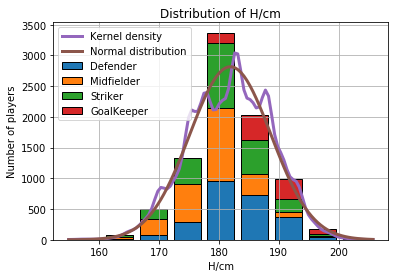

In [310]:
ddraw('H/cm')

C:\Users\z\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  """


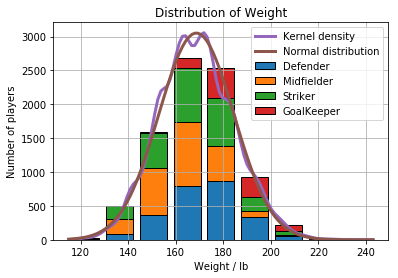

In [311]:
ddraw('Weight','lb')

C:\Users\z\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  """


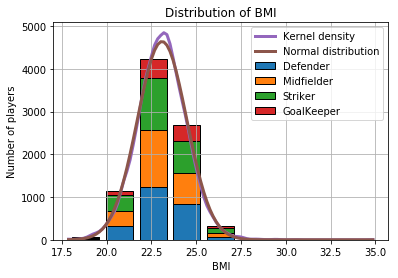

In [312]:
ddraw('BMI')

In [313]:
def pt(x,item,ply):
    for i in range(3):
        x1=x[i].index.values
        y1=x[i][item].values
        z1 = np.polyfit(x1, y1, 5)
        p1 = np.poly1d(z1)
        xv=np.linspace(min(x1),max(x1),100)
        yv=p1(xv)
        xname=x[i].index.name
        dx=ply[xname]
        normal = mlab.normpdf(xv, dx.mean(), dx.std())
        fig,ax=subplots()
        ax.scatter(xv, yv, c=normal, cmap=plt.cm.Blues,edgecolor='deepskyblue', s=20)
        ax.fill_between(xv,yv,min(yv)-10, facecolor='dodgerblue', alpha=0.6)
        ax.set_xlabel(xname+' / lb'*(xname=='Weight'))    
        ax.set_ylabel(item)
        ax.set_title(item +' vs '+xname)    
        ax.grid(True)
        fig.show()



In [335]:
def ptt(x,item,ply):
    for i in range(3):
        x1=x[i].index.values
        y1=x[i][item].values
        z1 = np.polyfit(x1, y1, 5)
        p1 = np.poly1d(z1)
        xv=np.linspace(min(x1),max(x1),100)
        yv=p1(xv)
        xname=x[i].index.name
        dx=ply[xname]
        normal = mlab.normpdf(xv, dx.mean(), dx.std())
        normal=normal+max(normal)/4
        fig,ax=subplots()
        #ax.scatter(xv, yv, c=normal, cmap=plt.cm.Blues,edgecolor='deepskyblue', s=20)
        ax.plot(xv, yv, '--')
        d=xv[1]-xv[0]
    
        for i in range(99):
            ax.add_patch(patches.Rectangle((xv[i],0),d,yv[i],color='dodgerblue',linewidth=0,alpha=normal[i]/max(normal)))  
        ax.set_xlabel(xname+' / lb'*(xname=='Weight'))    
        ax.set_ylabel(item)
        ax.set_title(item +' vs '+xname)    
        ax.grid(True)
        fig.show()
        


C:\Users\z\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  # This is added back by InteractiveShellApp.init_path()
C:\Users\z\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


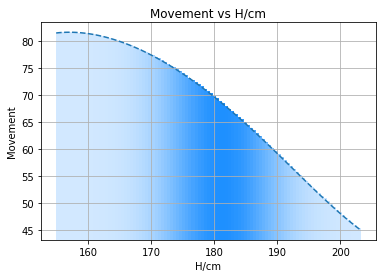

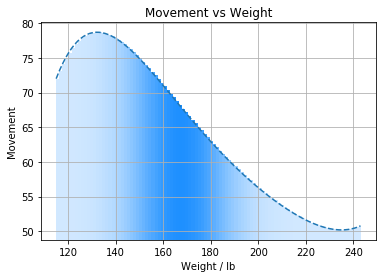

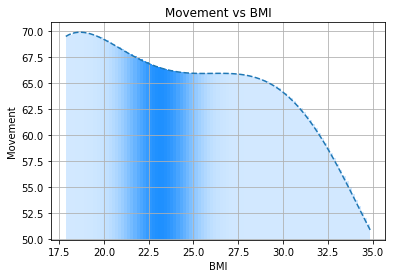

In [336]:
x=[opH,opW,opB]
ply=pd.concat([sp,mp,dp])
ptt(x,'Movement',ply)

C:\Users\z\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  # This is added back by InteractiveShellApp.init_path()
C:\Users\z\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


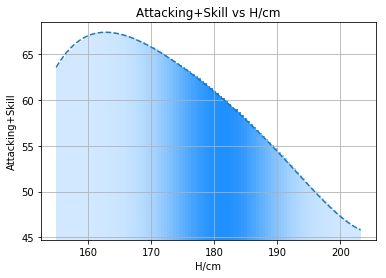

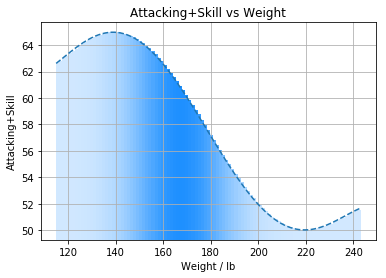

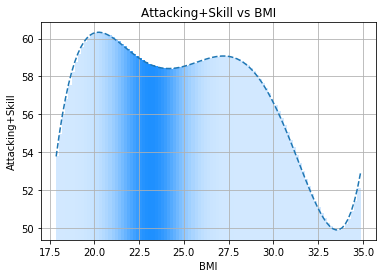

In [337]:
ptt(x,'Attacking+Skill',ply)

C:\Users\z\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  # This is added back by InteractiveShellApp.init_path()
C:\Users\z\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


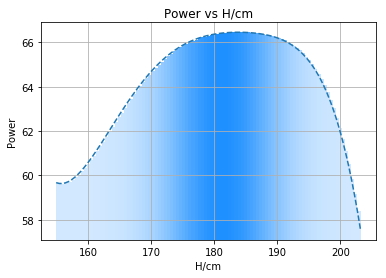

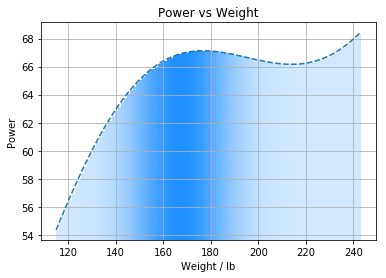

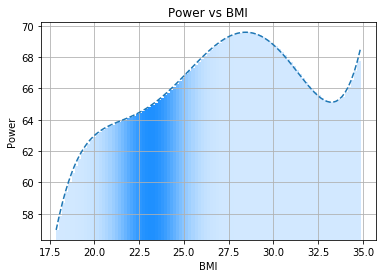

In [338]:
ptt(x,'Power',ply)

C:\Users\z\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  # This is added back by InteractiveShellApp.init_path()
C:\Users\z\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


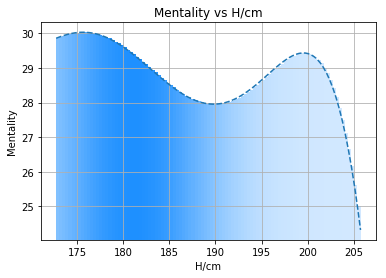

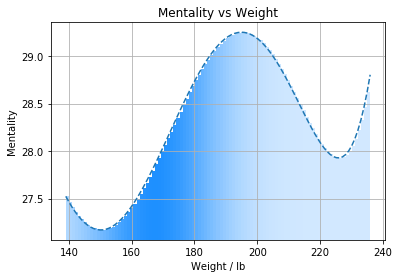

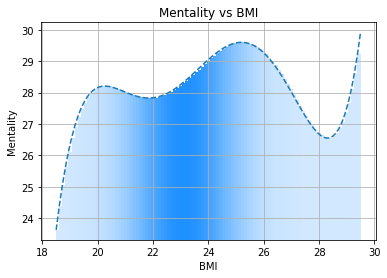

In [345]:
ptt(x,'Mentality',ply)

C:\Users\z\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  # This is added back by InteractiveShellApp.init_path()
C:\Users\z\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


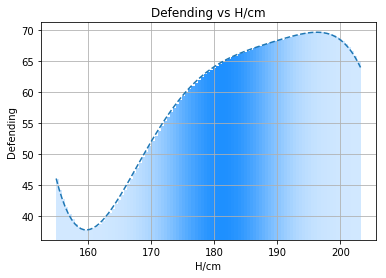

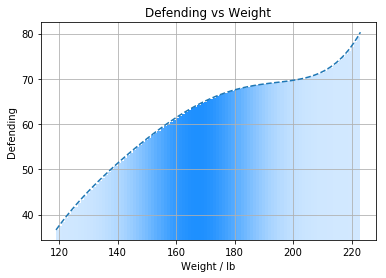

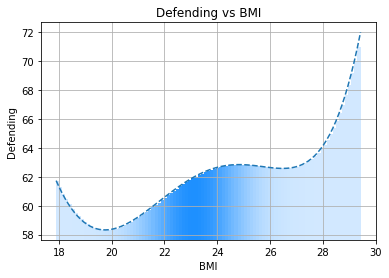

In [342]:
oop=pd.concat([mp,dp])
oopH=oop.groupby('H/cm').mean()
oopW=oop.groupby('Weight').mean()
oopB=oop.groupby('BMI').mean()
x=[oopH,oopW,oopB]
ptt(x,'Defending',oop)

C:\Users\z\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  # This is added back by InteractiveShellApp.init_path()
C:\Users\z\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


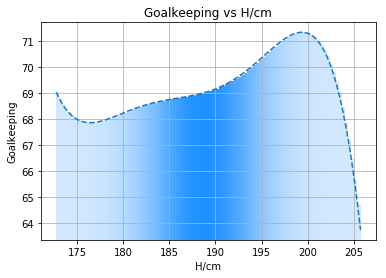

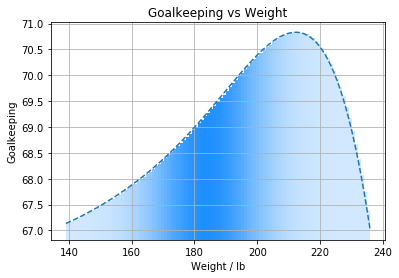

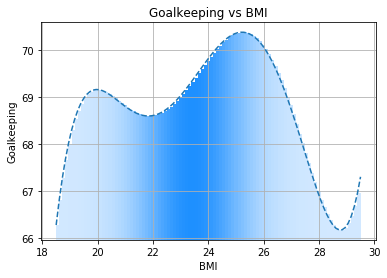

In [344]:
x=[gpH,gpW,gpB]
ptt(x,'Goalkeeping',gp)